In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv(r'C:\data science\own_project\Online Fraud Detection (ML)\static\csv_files\fraud_detection.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
499995,20,CASH_OUT,77616.32,C1125584113,402794.6,325178.28,C596605403,662541.78,410073.66,0
499996,20,CASH_OUT,63262.20,C1632642338,8500.0,0.00,C1989325178,0.00,63262.20,0
499997,20,PAYMENT,15019.29,C2105678886,5253.0,0.00,M171574465,0.00,0.00,0
499998,20,TRANSFER,355628.70,C1907483123,0.0,0.00,C1880058411,6533824.07,6889452.78,0


In [33]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [34]:
df.rename(columns={'type': 'types'}, inplace=True)

In [35]:
df.axes

[RangeIndex(start=0, stop=500000, step=1),
 Index(['step', 'types', 'amount', 'nameOrig', 'oldbalanceOrg',
        'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
        'isFraud'],
       dtype='object')]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   types           500000 non-null  object 
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  object 
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  object 
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 38.1+ MB


In [37]:
df.shape

(500000, 10)

In [38]:
df.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,500000,500000,500000,500000,500000,500000,500000
mean,13,166393,911692,931426,982773,1162668,0
std,3,272584,3016900,3054014,2336426,2510610,0
min,1,0,0,0,0,0,0
25%,11,13350,0,0,0,0,0
50%,14,81375,18569,0,119271,222144,0
75%,17,222644,170294,210171,896226,1201403,0
max,20,10000000,38939424,38946233,41482697,41482697,1


In [39]:
df.isnull().sum()

step              0
types             0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

Text(0, 0.5, 'count of online transaction type ')

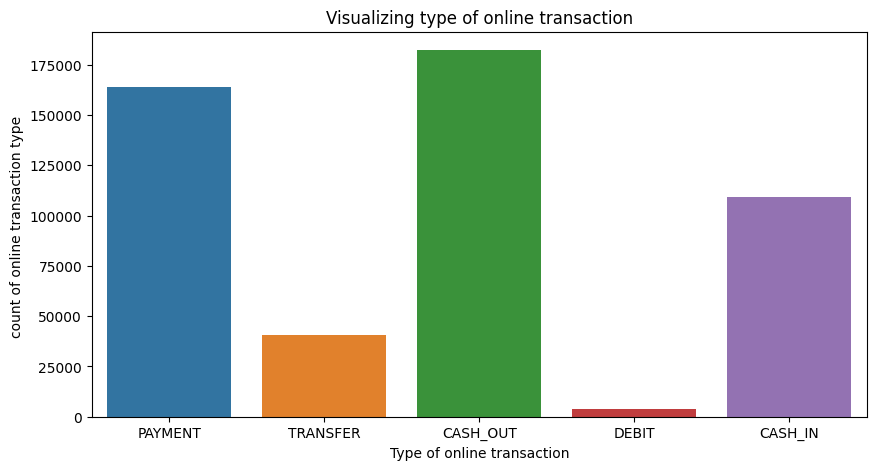

In [40]:
plt.figure(figsize=(10,5))
sns.countplot (x="types", data= df)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

## EDA

In [41]:
df['types'].value_counts()

types
CASH_OUT    182316
PAYMENT     164032
CASH_IN     109319
TRANSFER     40730
DEBIT         3603
Name: count, dtype: int64

In [42]:
df=pd.get_dummies(df,columns=['types'])
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,types_CASH_IN,types_CASH_OUT,types_DEBIT,types_PAYMENT,types_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20,77616.32,C1125584113,402794.6,325178.28,C596605403,662541.78,410073.66,0,False,True,False,False,False
499996,20,63262.20,C1632642338,8500.0,0.00,C1989325178,0.00,63262.20,0,False,True,False,False,False
499997,20,15019.29,C2105678886,5253.0,0.00,M171574465,0.00,0.00,0,False,False,False,True,False
499998,20,355628.70,C1907483123,0.0,0.00,C1880058411,6533824.07,6889452.78,0,False,False,False,False,True


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   amount          500000 non-null  float64
 2   nameOrig        500000 non-null  object 
 3   oldbalanceOrg   500000 non-null  float64
 4   newbalanceOrig  500000 non-null  float64
 5   nameDest        500000 non-null  object 
 6   oldbalanceDest  500000 non-null  float64
 7   newbalanceDest  500000 non-null  float64
 8   isFraud         500000 non-null  int64  
 9   types_CASH_IN   500000 non-null  bool   
 10  types_CASH_OUT  500000 non-null  bool   
 11  types_DEBIT     500000 non-null  bool   
 12  types_PAYMENT   500000 non-null  bool   
 13  types_TRANSFER  500000 non-null  bool   
dtypes: bool(5), float64(5), int64(2), object(2)
memory usage: 36.7+ MB


In [44]:
df['isFraud'].value_counts()

isFraud
0    499767
1       233
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

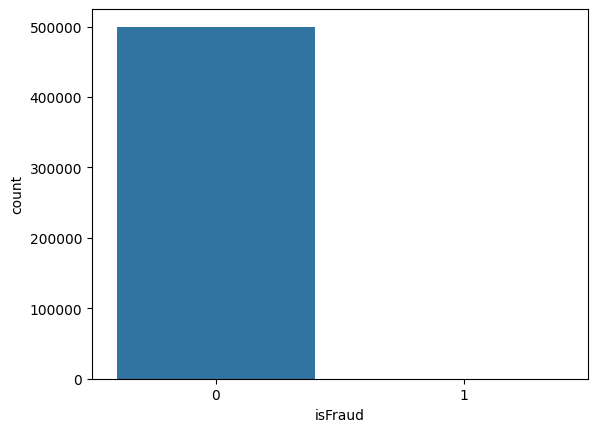

In [45]:
sns.countplot(x=df['isFraud'])

In [46]:
x = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis = 1)
y = df['isFraud']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=2)

In [48]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

In [49]:
logistic_clf.score(x_train,y_train)

0.9996085714285714

In [50]:
logistic_clf.score(x_test,y_test)

0.9996066666666666

In [51]:
y_pred = logistic_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[149924,      4],
       [    55,     17]], dtype=int64)

In [52]:
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    149928
           1       0.81      0.24      0.37        72

    accuracy                           1.00    150000
   macro avg       0.90      0.62      0.68    150000
weighted avg       1.00      1.00      1.00    150000



In [53]:
# Evaluation on Testning Data

y_pred = logistic_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :\n",accuracy)
print("*"*50)

Confusion Matrix :
 [[149924      4]
 [    55     17]]
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    149928
           1       0.81      0.24      0.37        72

    accuracy                           1.00    150000
   macro avg       0.90      0.62      0.68    150000
weighted avg       1.00      1.00      1.00    150000

**************************************************
Accuracy :
 0.9996066666666666
**************************************************


In [54]:
# Evaluation on Training Data

y_pred_train = logistic_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :\n",accuracy)
print("*"*50)

Confusion Matrix :
 [[349826     13]
 [   124     37]]
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    349839
           1       0.74      0.23      0.35       161

    accuracy                           1.00    350000
   macro avg       0.87      0.61      0.68    350000
weighted avg       1.00      1.00      1.00    350000

**************************************************
Accuracy :
 0.9996085714285714
**************************************************


### ROC Curve

In [55]:
y_pred_train_prob = logistic_clf.predict_proba(x_train)
y_pred_train_prob

array([[9.98004067e-01, 1.99593257e-03],
       [9.99986614e-01, 1.33858124e-05],
       [9.99999984e-01, 1.59141177e-08],
       ...,
       [9.99955919e-01, 4.40811615e-05],
       [9.99999716e-01, 2.84382959e-07],
       [9.99999838e-01, 1.62025112e-07]])

In [56]:
prob1 = 9.99979577e-01
prob2 = 2.04229624e-05
print(f'{prob1:.6f}', f'{prob2:.6f}')

0.999980 0.000020


In [57]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_train_prob[:,1])
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.85845775e-06,
       2.85845775e-06, 8.57537324e-06, 8.57537324e-06, 1.14338310e-05,
       1.14338310e-05, 2.00092042e-05, 2.00092042e-05, 2.85845775e-05,
       2.85845775e-05, 3.71599507e-05, 3.71599507e-05, 6.28860704e-05,
       6.28860704e-05, 1.02904479e-04, 1.02904479e-04, 1.17196768e-04,
       1.17196768e-04, 1.51498261e-04, 1.51498261e-04, 1.68649007e-04,
       1.68649007e-04, 3.34439556e-04, 3.34439556e-04, 1.37777663e-03,
       1.37777663e-03, 1.58072713e-03, 1.58072713e-03, 1.59787788e-03,
       1.59787788e-03, 1.65790549e-03, 1.65790549e-03, 1.70649928e-03,
       1.70649928e-03, 1.78939455e-03, 1.78939455e-03, 2.76412864e-03,
       2.76412864e-03, 2.77556247e-03, 2.77556247e-03, 2.89847616e-03,
       2.89847616e-03, 2.90419307e-03, 2.90419307e-03, 3.36440477e-03,
       3.36440477e-03, 3.52733686e-03, 3.52733686e-03, 3.64167517e-03,
       3.64167517e-03, 3.75887194e-03, 3.75887194e-03, 3.91894557e-03,
      

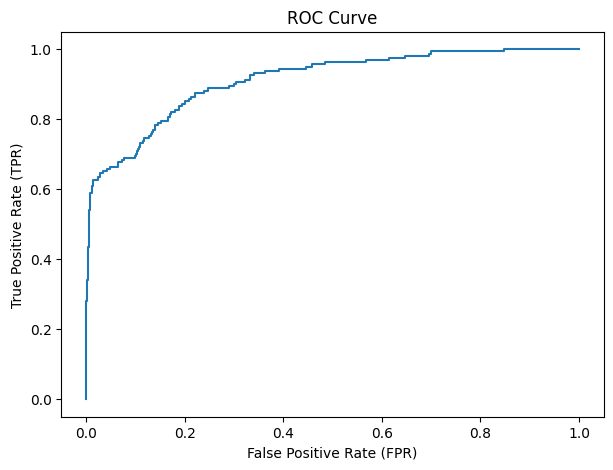

In [58]:
plt.figure(figsize=(7,5))
plt.title("ROC Curve")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.savefig("ROC_Curve.png")

## Prediction on Single Row

In [59]:
logistic_clf.n_features_in_

11

In [60]:
logistic_clf.coef_

array([[-6.70761352e-01, -1.61105412e-05,  2.50942709e-05,
        -6.15281961e-05,  5.59098974e-07, -1.08811130e-06,
        -2.81708338e-05, -2.99580448e-03, -7.96103363e-04,
        -4.59424372e-02,  1.20197688e-04]])

In [61]:
column_names = x.columns.tolist()
column_names

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'types_CASH_IN',
 'types_CASH_OUT',
 'types_DEBIT',
 'types_PAYMENT',
 'types_TRANSFER']

In [62]:
step = 19
amount = 10000000
oldbalanceOrg = 10000000
newbalanceOrig = 0
oldbalanceDest = 504326.62
newbalanceDest = 10342417.90
types = 'CASH_OUT'

types ='types_'+types

types_index = column_names.index(types)
types_index

test_array = np.zeros([1,logistic_clf.n_features_in_])
test_array[0,0] = step
test_array[0,1] = amount
test_array[0,2] = oldbalanceOrg
test_array[0,3] = newbalanceOrig
test_array[0,4] = oldbalanceDest
test_array[0,5] = newbalanceDest
test_array[0,types_index] = 1

def get_pred_fraud(test_array):
    pred_class = logistic_clf.predict(test_array)[0]

    if pred_class == 1:
        pred_fraud = "Fraud"
    else:
        pred_fraud = "Not Fraud"
        
    return pred_fraud

result = get_pred_fraud(test_array)

In [63]:
grouped_data = df.groupby('isFraud')
fraud_group = grouped_data.get_group(1)
fraud_group

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,types_CASH_IN,types_CASH_OUT,types_DEBIT,types_PAYMENT,types_TRANSFER
2,1,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,False,True,False,False,False
251,1,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,False,False,False,False,True
252,1,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,False,True,False,False,False
680,1,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481251,19,10000000.00,C2050703310,10000000.00,0.0,C1622860679,504326.62,10342417.90,1,False,True,False,False,False
481252,19,1861008.32,C1990303942,1861008.32,0.0,C1308678191,0.00,0.00,1,False,False,False,False,True
481253,19,1861008.32,C1718961034,1861008.32,0.0,C714051433,0.00,1789942.62,1,False,True,False,False,False
499609,20,16614.82,C2080146129,16614.82,0.0,C748889213,0.00,0.00,1,False,False,False,False,True


In [64]:
with open('logistic_classification.pkl','wb') as f:
    pickle.dump(logistic_clf, f)

In [65]:
project_data = {"column_names" : column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)